In [4]:
# 예제 6.4 : Fashion MNIST 데이터세트 불러오기 및 정규화
import tensorflow as tf

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
# 예제 6.5 : Fashion MNIST 데이터세트 불러오기 및 정규화
# reshape 이전
print(train_X.shape, test_X.shape)

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

# reshape 이후
print(train_X.shape, test_X.shape)

(60000, 28, 28) (10000, 28, 28)
(60000, 28, 28, 1) (10000, 28, 28, 1)


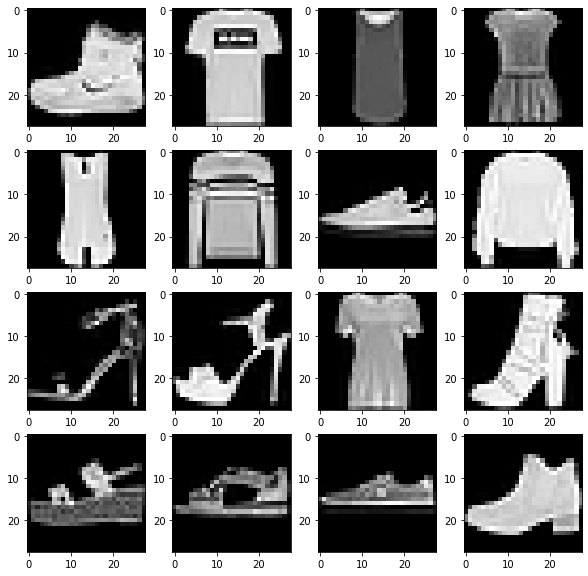

[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9]


In [6]:
# 예제 6.6 : 데이터 확인
import matplotlib.pyplot as plt

# 전체 그래프의 크기를 width = 10, height = 10으로 지정합니다.
plt.figure(figsize = (10, 10))
for c in range(16):
  # 4행 4열로 지정한 그리드에서 c + 1번째 칸에 그래프를 그립니다. 1 ~ 16번째 칸을 채우게 됩니다.
  plt.subplot(4, 4, c + 1)
  plt.imshow(train_X[c].reshape(28, 28), cmap = 'gray')

plt.show()

# 훈련 데이터의 첫 번째 ~ 16번째 까지의 라벨을 프린트합니다.
print(train_Y[: 16])

In [7]:
# 예제 6.7 : Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 16),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 32),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128, activation = 'relu'),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
flatten (Flatten)            (None, 30976)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               3965056   
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 3,989,642
Trainable params: 3,989,642
Non-trainable params: 0
______________________________________________

In [8]:
!nvidia-smi

Fri Apr 24 10:13:33 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 440.64.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    23W /  75W |    269MiB /  7611MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

Epoch 1/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.4721 - accuracy: 0.8312 - val_loss: 0.3882 - val_accuracy: 0.8637
Epoch 2/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3428 - accuracy: 0.8747 - val_loss: 0.3638 - val_accuracy: 0.8703
Epoch 3/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2904 - accuracy: 0.8941 - val_loss: 0.3765 - val_accuracy: 0.8672
Epoch 4/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2456 - accuracy: 0.9084 - val_loss: 0.3910 - val_accuracy: 0.8690
Epoch 5/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2188 - accuracy: 0.9185 - val_loss: 0.4270 - val_accuracy: 0.8659
Epoch 6/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1859 - accuracy: 0.9304 - val_loss: 0.4670 - val_accuracy: 0.8631
Epoch 7/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.1684 - accuracy: 0.9386 - val_loss: 0.5319 - val_accuracy:

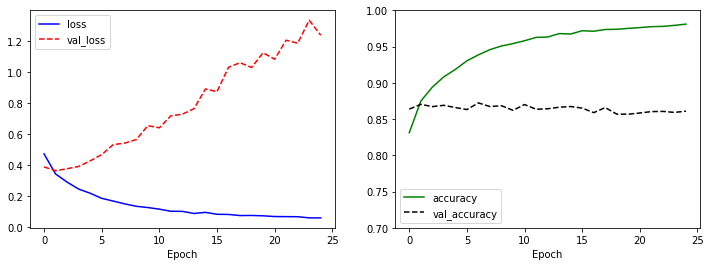

313/313 [==============================] - 1s 3ms/step - loss: 1.2457 - accuracy: 0.8575


[1.2456538677215576, 0.8575000166893005]

In [9]:
# 예제 6.9 : Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 학습
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)

In [10]:
# 예제 6.10 : Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 정의 - 풀링 레이어, 드롭아웃 레이어 추가
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64),
                             tf.keras.layers.MaxPool2D(strides = (2, 2)),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 128, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.3),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)              

Epoch 1/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.5223 - accuracy: 0.8106 - val_loss: 0.3570 - val_accuracy: 0.8693
Epoch 2/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3572 - accuracy: 0.8718 - val_loss: 0.3255 - val_accuracy: 0.8789
Epoch 3/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.3172 - accuracy: 0.8829 - val_loss: 0.3060 - val_accuracy: 0.8893
Epoch 4/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2894 - accuracy: 0.8933 - val_loss: 0.2990 - val_accuracy: 0.8913
Epoch 5/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2659 - accuracy: 0.9023 - val_loss: 0.3009 - val_accuracy: 0.8935
Epoch 6/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2485 - accuracy: 0.9067 - val_loss: 0.3169 - val_accuracy: 0.8889
Epoch 7/25
1407/1407 [==============================] - 5s 4ms/step - loss: 0.2374 - accuracy: 0.9123 - val_loss: 0.2997 - val_accuracy:

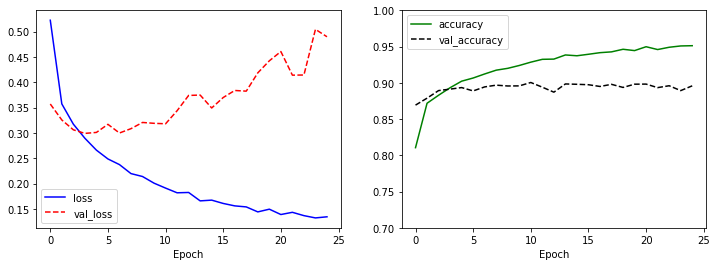

313/313 [==============================] - 1s 2ms/step - loss: 0.5252 - accuracy: 0.8930


[0.5252033472061157, 0.8930000066757202]

In [11]:
# 예제 6.11 : Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 학습 - 풀링 레이어, 드롭아웃 레이어 추가
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

import matplotlib.pyplot as plt
plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)